In [4]:
import numpy as np 
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
suburbs = []
subs = open('areas.txt', 'r')
for line in subs:
    line = line.replace('(', '')
    line = line.replace(')', '')
    line = line.strip()
    suburbs.append(line)
subs.close
print(suburbs)

['Aadhar Multispeciality Hospital, Narhe Pune', 'Anmol Multispeciality Clinic Hospital', 'ANUJA HOSPITAL', 'Bharati Hospital', 'City Care Hospital', 'City Hospital', 'Gawali Hospital', 'jalore hospital', 'Jeevan Uday Multispeciality Hospital', 'Khetmalas Hospital', 'KHETMALAS Hospital1', 'Lifeline Hospital', 'Mai Mangeshkar Hospital', 'Manas Hospital', 'MINERVA HOSPITAL', 'Mixis Multi Specialty Hospital', 'Nagare Nursing Home', 'Nanded Multispeciality Hospital', 'PATIL MULTISPECIALITY HOSPITAL AND LAPROSCOPY CENTER', 'Pune Medical and Research', 'Royal Hospital', 'Sai Sneh Hospital and Diagnostic Center', 'sanjivani hospital', 'Sharayu Multispeciality Hospital', 'SHIVNERI HOSPITAL', 'Shraddha Hospitals', 'SHREE HOSPITAL, NARHE, PUNE', 'Shreeyash Multi-speciality Hospital', 'Shrimangal hospital', 'Shwas Multispeciality Hospital', 'Siddhivinayak General Hospital', 'SILVER BIRCH MULTISPECIALITY HOSPITAL PVT.LTD', 'Sinhagad Speciality Hospital', 'Thube Nursing Home', 'VIGHNAHARTA HOSPITAL'

In [6]:
filenames = []
for i in range(0, len(suburbs)):
  filenames.append("./Reviews/"+str(suburbs[i])+"/reviews.csv")
  # filenames = [
  #             "./Reviews/ANUJA HOSPITAL/reviews.csv",
  #           ]

# merging two csv files
df = pd.concat(
    map(pd.read_csv, filenames), ignore_index=True)

print(len(df))
df

3841


,Rating,Review
0,5 stars,Best Multispecialty hospital in narhe near sin...
1,1 star,Not good hospital. Very very very much waiting...
2,1 star,Our patient got discharge 2 days before i expi...
3,5 stars,As a Surgeon I will always recommend Aadhar Mu...
4,5 stars,I am very frequent visitor to this hospital f...
...,...,...
3836,5 stars,Very NC hospital bcoz there is staff.. Very g...
3837,5 stars,Excellent Covid Vaccination Setup. Would like ...
3838,5 stars,Visited on 2nd June. Best arrangement for Vacc...
3839,5 stars,Very well organised. There are snacks if you n...


In [7]:
review_remove_translated = []

reviews_dict = df.to_dict('list')

for review in reviews_dict['Review']:
  review_sep = str(review).split("(Translated by Google) ")
  
  # Jika terdapat (Translated by Google)
  if review_sep[0] == "":
    review_sep = ("".join(review_sep)).split("(Original)")
    review_sep = review_sep[0]
    review = "".join(review_sep)
  
  review_remove_translated.append(review)

In [8]:
reviews_dict['Review'] = review_remove_translated
df = pd.DataFrame(reviews_dict)
df

,Rating,Review
0,5 stars,Best Multispecialty hospital in narhe near sin...
1,1 star,Not good hospital. Very very very much waiting...
2,1 star,Our patient got discharge 2 days before i expi...
3,5 stars,As a Surgeon I will always recommend Aadhar Mu...
4,5 stars,I am very frequent visitor to this hospital f...
...,...,...
3836,5 stars,Very NC hospital bcoz there is staff.. Very g...
3837,5 stars,Excellent Covid Vaccination Setup. Would like ...
3838,5 stars,Visited on 2nd June. Best arrangement for Vacc...
3839,5 stars,Very well organised. There are snacks if you n...


In [9]:
import string
import re

In [10]:
def clean_review(review):
    return re.sub('[^a-zA-Z]', ' ', review).lower()
  
df['cleaned_review'] = df['Review'].apply(lambda x: clean_review(str(x)))
df['label'] = df['Rating'].map({"1 star":0, "2 stars":0, "3 stars":0, "4 stars":1, "5 stars":1})

In [11]:
def count_punct(review):
    count = sum([1 for char in review if char in string.punctuation])
    return round(count/(len(review) - review.count(" ")), 3)*100
  
df['review_len'] = df['Review'].apply(lambda x: len(str(x)) - str(x).count(" "))
df['punct'] = df['Review'].apply(lambda x: count_punct(str(x)))
df

,Rating,Review,cleaned_review,label,review_len,punct
0,5 stars,Best Multispecialty hospital in narhe near sin...,best multispecialty hospital in narhe near sin...,1,332,2.4
1,1 star,Not good hospital. Very very very much waiting...,not good hospital very very very much waiting...,0,224,3.6
2,1 star,Our patient got discharge 2 days before i expi...,our patient got discharge days before i expi...,0,394,2.8
3,5 stars,As a Surgeon I will always recommend Aadhar Mu...,as a surgeon i will always recommend aadhar mu...,1,319,5.3
4,5 stars,I am very frequent visitor to this hospital f...,i am very frequent visitor to this hospital f...,1,167,4.8
...,...,...,...,...,...,...
3836,5 stars,Very NC hospital bcoz there is staff.. Very g...,very nc hospital bcoz there is staff very g...,1,111,17.1
3837,5 stars,Excellent Covid Vaccination Setup. Would like ...,excellent covid vaccination setup would like ...,1,880,2.3
3838,5 stars,Visited on 2nd June. Best arrangement for Vacc...,visited on nd june best arrangement for vacc...,1,348,4.0
3839,5 stars,Very well organised. There are snacks if you n...,very well organised there are snacks if you n...,1,625,2.9


In [12]:
def tokenize_review(review):
    tokenized_review = review.split()
    return tokenized_review
  
df['tokens'] = df['cleaned_review'].apply(lambda x: tokenize_review(x))
df.head()

,Rating,Review,cleaned_review,label,review_len,punct,tokens
0,5 stars,Best Multispecialty hospital in narhe near sin...,best multispecialty hospital in narhe near sin...,1,332,2.4,"[best, multispecialty, hospital, in, narhe, ne..."
1,1 star,Not good hospital. Very very very much waiting...,not good hospital very very very much waiting...,0,224,3.6,"[not, good, hospital, very, very, very, much, ..."
2,1 star,Our patient got discharge 2 days before i expi...,our patient got discharge days before i expi...,0,394,2.8,"[our, patient, got, discharge, days, before, i..."
3,5 stars,As a Surgeon I will always recommend Aadhar Mu...,as a surgeon i will always recommend aadhar mu...,1,319,5.3,"[as, a, surgeon, i, will, always, recommend, a..."
4,5 stars,I am very frequent visitor to this hospital f...,i am very frequent visitor to this hospital f...,1,167,4.8,"[i, am, very, frequent, visitor, to, this, hos..."


In [13]:
import nltk
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

In [14]:
def lemmatize_review(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_review(x))
df.head()

,Rating,Review,cleaned_review,label,review_len,punct,tokens,lemmatized_review
0,5 stars,Best Multispecialty hospital in narhe near sin...,best multispecialty hospital in narhe near sin...,1,332,2.4,"[best, multispecialty, hospital, in, narhe, ne...",best multispecialty hospital narhe near sinhga...
1,1 star,Not good hospital. Very very very much waiting...,not good hospital very very very much waiting...,0,224,3.6,"[not, good, hospital, very, very, very, much, ...",not good hospital much waiting report collecti...
2,1 star,Our patient got discharge 2 days before i expi...,our patient got discharge days before i expi...,0,394,2.8,"[our, patient, got, discharge, days, before, i...",patient got discharge day expirienced followin...
3,5 stars,As a Surgeon I will always recommend Aadhar Mu...,as a surgeon i will always recommend aadhar mu...,1,319,5.3,"[as, a, surgeon, i, will, always, recommend, a...",surgeon always recommend aadhar multispecialty...
4,5 stars,I am very frequent visitor to this hospital f...,i am very frequent visitor to this hospital f...,1,167,4.8,"[i, am, very, frequent, visitor, to, this, hos...",frequent visitor hospital wife treatment docto...


In [15]:
#  Shape of the dataset, and breakdown of the classes
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")

Input data has 3841 rows and 8 columns


Number of null in label: 0
Number of null in text: 0


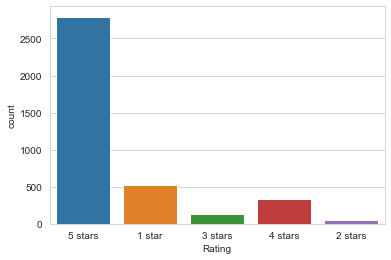

In [16]:
print(f"Number of null in label: { df['Rating'].isnull().sum() }")
print(f"Number of null in text: { df['Review'].isnull().sum() }")
sns.countplot(x='Rating', data=df);

In [17]:
X = df[['lemmatized_review', 'review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(3841, 3)
(3841,)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2688, 3)
(1153, 3)
(2688,)
(1153,)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,review_len,punct,0,1,2,3,4,5,6,7,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,54,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.98      0.38      0.55       234
           1       0.86      1.00      0.93       919

    accuracy                           0.87      1153
   macro avg       0.92      0.69      0.74      1153
weighted avg       0.89      0.87      0.85      1153



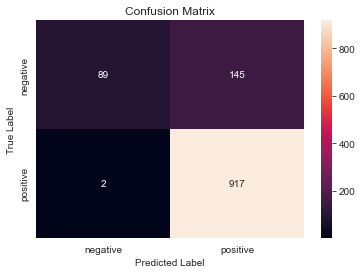

In [21]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.48      0.65       234
           1       0.88      1.00      0.94       919

    accuracy                           0.89      1153
   macro avg       0.93      0.74      0.79      1153
weighted avg       0.90      0.89      0.88      1153



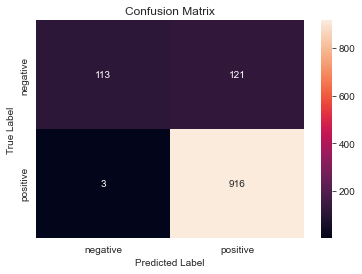

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [23]:
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'linear', random_state = 0)
# classifier.fit(X_train_vect, y_train)
# svm_pred = classifier.predict(X_test_vect)
# # Classification report
# print(classification_report(y_test, svm_pred))

# # Confusion Matrix
# class_label = ["negative", "positive"]
# df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
# sns.heatmap(df_cm, annot=True, fmt='d')
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.show()

              precision    recall  f1-score   support

           0       0.43      0.08      0.13       234
           1       0.81      0.97      0.88       919

    accuracy                           0.79      1153
   macro avg       0.62      0.53      0.51      1153
weighted avg       0.73      0.79      0.73      1153



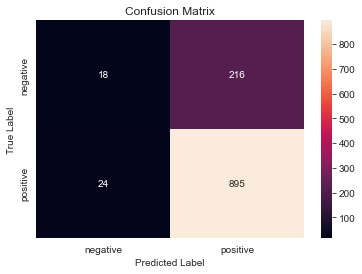

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [25]:
# from sklearn.model_selection import cross_val_score

# models = [
#           MultinomialNB(),
#           LogisticRegression(),
#           SVC(kernel = 'linear'),
#           KNeighborsClassifier(n_neighbors = 5),
#          ]
# names = ["Naive Bayes", "Logistic Regression", "SVM", "KNN"]
# for model, name in zip(models, names):
#     print(name)
#     for score in ["accuracy", "precision", "recall", "f1"]:
#         print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
#     print()

In [26]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 10)
# from sklearn.ensemble import ExtraTreesClassifier
# classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)

classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.9037294015611448

In [27]:
data = ["Bad", "Good", "I love the service, it's really good", "Worst"]
vect = tfidf.transform(data).toarray()

my_pred = classifier.predict(vect)
print(my_pred)

[0 1 1 0]


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [29]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)


0.9080659150043365

In [30]:
data = ["Bad", "Worst service, don't go there", "Services are OK", "Good service", "The nurse is so kind"]
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
print(my_prediction)

[0 0 1 1 1]


In [31]:
import sys

In [32]:
pointer = open("./Reviews/Sancheti Hospital/reviews.csv", "r")
txt = pointer.read()
service = []
#print(txt)

def find_services(txt, services):
    ortho = re.search("[a-z].*[oO]rtho*", txt)
    pedia = re.search("[a-z].*[pP]edia*", txt)
    cardio = re.search("[a-z].*[cC]ardio*", txt)
    derma = re.search("[a-z].*[dD]erma*", txt)
    endo = re.search("[a-z].*[eE]ndo*", txt)
    gastro = re.search("[a-z].*[gG]astro*", txt)
    nephro = re.search("[a-z].*[nN]ephro*", txt)
    neuro = re.search("[a-z].*[nN]euro*", txt)
    onco = re.search("[a-z].*[oO]nco*", txt)
    optha = re.search("[a-z].*[oO]ptha*", txt)

    if ortho:
        services.append("orthopedic")
    if pedia:
        services.append("pediatric")
    if cardio:
        services.append("cardiologic")
    if derma:
        services.append("dermatology")
    if endo:
        services.append("endocrinology")
    if gastro:
        services.append("gastrology")
    if nephro:
        services.append("nephrology")
    if neuro:
        services.append("neurology")
    if onco:
        services.append("oncology")
    if optha:
        services.append("opthalogy")

    return services

services = find_services(txt, service)
print(services)

pointer.close()

['orthopedic', 'pediatric', 'endocrinology', 'oncology']


In [47]:
#18.4491376
#73.8760855

lat = float(input("Enter your latitude: "))
lon = float(input("Enter your longitude: "))

ran = float(input("Enter the range(in km): "))

def recommend_hospital():

        change_per_deg_lat = 111.2
        change_per_deg_long = 105.75

        df = pd.read_csv("modified.csv")

        for row in df.itertuples():

                x = abs(float(row[6]) - lon) * change_per_deg_long
                y = abs(float(row[5]) - lat) * change_per_deg_lat
                dist = (x**2 + y**2)**(1/2)

                if dist <= ran:
                        #print(row[1])

                        if row[1] not in suburbs:
                                continue
                        process = read_csv("./Reviews/"+str(row[1])+"/reviews.csv")
                        pointer = open("./Reviews/"+str(row[1])+"/reviews.csv", "r")
                        txt = pointer.read()
                        service = []

                        services = find_services(txt, service)
                        data = process['Review'].to_list()
                        vect = cv.transform(data).toarray()

                        my_prediction = clf.predict(vect)
                        flag = "Bad"
                        zeroes = len(my_prediction) - np.count_nonzero(my_prediction)
                        # print(zeroes)
                        # print(np.count_nonzero(my_prediction))
                        if np.count_nonzero(my_prediction) > 3*zeroes:
                                flag = "Good"
                        if np.count_nonzero(my_prediction) > 4*(zeroes+1):
                                flag = "Excellent"
                        if np.count_nonzero(my_prediction) <= 3*zeroes:
                                flag = "Not good"
                        # print(my_prediction)
                        
                        sys.stdout.write("\033[1;32m")
                        if flag == "Not good":
                                sys.stdout.write("\033[1;31m")
                                print("We do not recommend "+str(row[1])+" since it is",flag,"hospital")
                        elif flag == "Good":
                                sys.stdout.write("\033[1;35m")
                                print(str(row[1])+" is a",flag,"hospital")
                        else:
                                print("We recommend "+str(row[1])+" ,it is an",flag,"hospital")
                        sys.stdout.write("\033[1;33m")
                        if len(services):
                                print("Here, the specialities offered are ")
                                print(services)

                        print("\n")
                        sys.stdout.write("\033[0;0m")

        

recommend_hospital()

We recommend Royal Hospital ,it is an Excellent hospital
Here, the specialities offered are 
['endocrinology']


Khetmalas Hospital is a Good hospital


City Care Hospital is a Good hospital


Pune Medical and Research is a Good hospital


We recommend Sai Sneh Hospital and Diagnostic Center ,it is an Excellent hospital
Here, the specialities offered are 
['cardiologic', 'endocrinology', 'oncology']


We do not recommend Bharati Hospital since it is Not good hospital
Here, the specialities offered are 
['orthopedic', 'pediatric', 'dermatology', 'endocrinology', 'gastrology', 'neurology', 'oncology']


Gawali Hospital is a Good hospital


Mixis Multi Specialty Hospital is a Good hospital


Srishti Hospital is a Good hospital


We recommend Satyanand Hospital - Best Elderly Care In Pune ,it is an Excellent hospital
Here, the specialities offered are 
['orthopedic', 'pediatric', 'endocrinology', 'oncology']


Global Health Care Hospital is a Good hospital
Here, the specialities offered ar

In [50]:
from tkinter import *
from tkinter import messagebox as mb
root = Tk()  # create root window
root.title("Text Summarizer")
root.config(bg="LemonChiffon")
root.geometry("800x900")
#Main Title
labeltext = Label(
    root,
    text = "Hospital Recommendation system\n___________________",
    background="LemonChiffon",
    font = ("Cambria", 25, "bold")
)

labeltext.pack(pady=(40,0))

labeltext1 = Label(
    root,
    text = "Here, you will get the top hospitals recommended based on your location and the medical specialist you are in search for!!",
    background="LemonChiffon",
    font = ("Cambria", 18)
)

labeltext1.pack(pady=(25,0))
	


inputtxt = Text(
    root,
    height = 2,
    width = 75,
    font = ('Cambria', 12),
    bg = "light cyan",
)


inputtxt.pack(padx=(0,0),pady=(50,0))

confirm = Label(
    root,
    height = 3,
    width = 25,
    text = "Speciality",
    font = ('Cambria', 12),
    bg = "bisque3",
)

confirm.pack(padx=(0,0),pady=(50,0))


inputtxt1 = Text(
    root,
    height = 2,
    width = 50,
    font = ('Cambria', 12),
    bg = "light cyan",
)

inputtxt1.pack(padx=(0,0),pady=(50,0))


outputtxt = Label(
    root,
    height = 17,
    width = 180,
    font = ('Cambria', 15),
    wraplength = 1600,
)
outputtxt.pack(pady=(25,0))

class Summary:

    def __init__(self):
        self.entryvar=""  
        self.option=""
        print ("Created an instance of Summary class")
        self.processing()

    def Take_input(self):
       self.entryvar = inputtxt.get("1.0", "end")
       self.option = inputtxt1.get("1.0", "end")
       

    def processing(self):
        
        self.Take_input()
        print ("Taking Input ", type(self.option), type(self.entryvar))
        rd_option = self.option.strip()
        fname = self.entryvar.strip()
        print ("Option value is ", rd_option, fname)
        if(rd_option == "1"):
            change_per_deg_lat = 111.2
            change_per_deg_long = 105.75

            df = pd.read_csv("modified.csv")

            for row in df.itertuples():

                x = abs(float(row[6]) - lon) * change_per_deg_long
                y = abs(float(row[5]) - lat) * change_per_deg_lat
                dist = (x**2 + y**2)**(1/2)

                if dist <= ran:
                        #print(row[1])

                        if row[1] not in suburbs:
                                continue
                        process = read_csv("./Reviews/"+str(row[1])+"/reviews.csv")
                        pointer = open("./Reviews/"+str(row[1])+"/reviews.csv", "r")
                        txt = pointer.read()
                        service = []

                        services = find_services(txt, service)
                        data = process['Review'].to_list()
                        vect = cv.transform(data).toarray()

                        my_prediction = clf.predict(vect)
                        flag = "Bad"
                        zeroes = len(my_prediction) - np.count_nonzero(my_prediction)
                        # print(zeroes)
                        # print(np.count_nonzero(my_prediction))
                        if np.count_nonzero(my_prediction) > 3*zeroes:
                                flag = "Good"
                        if np.count_nonzero(my_prediction) > 4*(zeroes+1):
                                flag = "Excellent"
                        if np.count_nonzero(my_prediction) <= 3*zeroes:
                                flag = "Not good"
                        # print(my_prediction)
                        
                        sys.stdout.write("\033[1;32m")
                        if flag == "Not good":
                                sys.stdout.write("\033[1;31m")
                                print("We do not recommend "+str(row[1])+" since it is",flag,"hospital")
                        elif flag == "Good":
                                sys.stdout.write("\033[1;35m")
                                print(str(row[1])+" is a",flag,"hospital")
                        else:
                                print("We recommend "+str(row[1])+" ,it is an",flag,"hospital")
                        sys.stdout.write("\033[1;33m")
                        if len(services):
                                print("Here, the specialities offered are ")
                                print(services)

                        print("\n")
                        sys.stdout.write("\033[0;0m")
            # print ("Opening file ", fname)
            # fileObject = open(fname, "r")
            # if(fileObject==None):
            #     print("file not found")
            # else:
            #     print ("File Found")
            #     data = fileObject.read()
            # #print("file not found")    
            # #for i in data :
            # #    print("text: ")
            # #    print(i)
            # ##print(data)   
            #     text=data
            #     arr=text.split(".")
            # #print(arr)

            # #parsing the URL content and storing in a variable
            #     final_text=""
            #     for i in arr:
            #         t=i.strip()
            #         new_line = re.sub("\[[0-9]+\]", '', t)
            #         final_text=final_text+new_line+"."
            #     #print(new_line)

            #     text=final_text    



            # #print("article")
            # #print(article_parsed)

            # #returning <p> tags


            # #looping through the paragraphs and adding them to the variable


            # #print(text)
            # # # Input text - to summarize 


            # # Tokenizing the text
            #     stopWords = set(stopwords.words("english"))
            #     words = word_tokenize(text) 
            # # Creating a frequency table to keep the 
            # # score of each word 
            #     freqTable = dict()
            #     for word in words:
            #         word = word.lower()
            #         if word in stopWords:
            #             continue
            #         if word in freqTable:
            #             freqTable[word] += 1
            #         else:
            #             freqTable[word] = 1 
            # # Creating a dictionary to keep the score
            # # of each sentence
            #     sentences = sent_tokenize(text)
            #     sentenceValue = dict() 
            #     for sentence in sentences:
            #         for word, freq in freqTable.items():
            #             if word in sentence.lower():
            #                 if sentence in sentenceValue:
            #                     sentenceValue[sentence] += freq
            #                 else:
            #                     sentenceValue[sentence] = freq   
            #     sumValues = 0
            #     for sentence in sentenceValue:
            #         sumValues += sentenceValue[sentence] 
            # # Average value of a sentence from the original text 
            #     average = int(sumValues / len(sentenceValue)) 
            # # Storing sentences into our summary.
                summary = ''
            #     for sentence in sentences:
            #         if (sentence in sentenceValue) and (sentenceValue[sentence] > (1.2 * average)):
            #             summary += " " + sentence
            #             print(summary)
                
                outputtxt.configure(text=summary)

obj=Summary()

Show = Button(
     root,
     background="GreenYellow",
     height = 2,
     width = 22,
     text ="Show output",
     font = ('Cambria', 10),
     command = obj.processing
)

Show.pack(pady=(25,0))

root.mainloop()

Created an instance of Summary class
Taking Input  <class 'str'> <class 'str'>
Option value is   
Taking Input  <class 'str'> <class 'str'>
Option value is   


In [35]:
process = read_csv("./Reviews/Sancheti Hospital/reviews.csv")
data = process['Review'].to_list()
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
flag = "Bad"
zeroes = len(my_prediction) - np.count_nonzero(my_prediction)
if np.count_nonzero(my_prediction) > zeroes:
    flag = "Good"
# print(my_prediction)
# print(zeroes)
# print(np.count_nonzero(my_prediction))
print(flag)

Good


In [36]:
list_hosp = recommend_hospital()
#18.4491376
#73.8760855
print(list_hosp)
for x in list_hosp:
    print(x)
    if x in suburbs:
        print("Control reached here\n")
        process = read_csv("./Reviews/"+str(x)+"/reviews.csv")
        data = process['Review'].to_list()
        vect = cv.transform(data).toarray()

        my_prediction = clf.predict(vect)
        flag = "Bad"
        zeroes = len(my_prediction) - np.count_nonzero(my_prediction)
        if np.count_nonzero(my_prediction) > zeroes:
            flag = "Good"
        # print(my_prediction)
        # print(zeroes)
        # print(np.count_nonzero(my_prediction))
        print(flag)

We recommend Royal Hospital ,it is an Excellent hospital
Here, the specialities offered are 
['endocrinology']


Khetmalas Hospital is a Good hospital


City Care Hospital is a Good hospital


Pune Medical and Research is a Good hospital


We recommend Sai Sneh Hospital and Diagnostic Center ,it is an Excellent hospital
Here, the specialities offered are 
['cardiologic', 'endocrinology', 'oncology']


Gawali Hospital is a Good hospital


Mixis Multi Specialty Hospital is a Good hospital


Srishti Hospital is a Good hospital


Trimal Hospital is a Good hospital
Here, the specialities offered are 
['endocrinology']


None


TypeError: 'NoneType' object is not iterable